# Converting Coordinate Reference Systems
USAID requires that all data be stored in the World Geodetic System 1984 (WGS 84). Coordinates should be specified in decimal degrees with at least 5 decimal places. See [ADS 579saa](https://www.usaid.gov/ads/policy/500/579saa) for additional details.

This notebook will introduce you to use of the Python library `geopandas` for converting geospatial files to Coordinate Reference System (CRS) WGS 84.

Guatemala has a CRS for official use ([Guatemala GTM (42500)](https://spatialreference.org/ref/sr-org/guatemala-gtm-42500/) ). Geospatial data from government and academic institutions is often shared in this CRS.

In [1]:
!pip install geopandas

In [2]:
!pip install contextily

In [3]:
import geopandas as gpd
import contextily as cx

To follow along, navigate to the [IDEG Geospatial Portal](https://ideg.segeplan.gob.gt/geoportal/) and download the `limites_departamentales` file in geoJSON format.

Upload to the file uploader in the left sidebar (if on Colab) or update the filename in the code cell below (if on Jupyter Notebook).

In [4]:
in_data_path = '/agrip_03_Limites_departamentales.json'
gdf = gpd.read_file(in_data_path)
gdf.head()

ERROR:fiona._env:PROJ: proj_create: crs not found


,id,objectid,departamen,cod_dep,shape_leng,shape_area,geometry
0,03_Limites_departamentales.1,1,Alta Verapaz,16,703968.892248,1.063667e+10,"MULTIPOLYGON (((505937.61310 1777349.10560, 53..."
1,03_Limites_departamentales.2,2,Baja Verapaz,15,324376.060690,3.016711e+09,"MULTIPOLYGON (((485739.74030 1690853.41070, 48..."
2,03_Limites_departamentales.3,3,Chimaltenango,4,232605.794501,1.863380e+09,"MULTIPOLYGON (((446325.82350 1651764.00870, 44..."
3,03_Limites_departamentales.4,4,Chiquimula,20,276903.287119,2.402286e+09,"MULTIPOLYGON (((637632.37240 1653403.41100, 63..."
4,03_Limites_departamentales.5,5,El Progreso,2,225159.276340,1.834559e+09,"MULTIPOLYGON (((560221.16490 1674145.47840, 56..."


You may see a warning that a CRS is not found. You may find you can plot the data, however any analysis may be incorrect. 

This file does in fact include a CRS, however it was not recognized by `geopandas`. We can inspect the JSON file to discover the CRS. 

In [5]:
import json

# Opening JSON file
with open(in_data_path) as f:
  data = json.load(f)
  
data.get('crs')

{'type': 'name', 'properties': {'name': 'urn:ogc:def:crs:EPSG::42500'}}

We can set the CRS directly with `geopandas` by assigning the `proj4` string to the `crs` method of the `geodataframe`. The `proj4` string is available from the [documentation](https://spatialreference.org/ref/sr-org/guatemala-gtm-42500/).

---



In [6]:
gdf.crs = "+proj=tmerc +lat_0=0 +lon_0=-90.5 +k=0.9998 +x_0=500000 +y_0=0 +ellps=WGS84 +units=m +no_defs"

Next, we'll convert from the provided CRS to the desired CRS WGS 84. Note this method returns a `geodataframe` rather than modifying the existing `geodataframe`, so we will assign the result. 

In [8]:
gdf_projected = gdf.to_crs("EPSG:4326")
gdf_projected.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Finally, let's plot the data to confirm it is projected correctly.

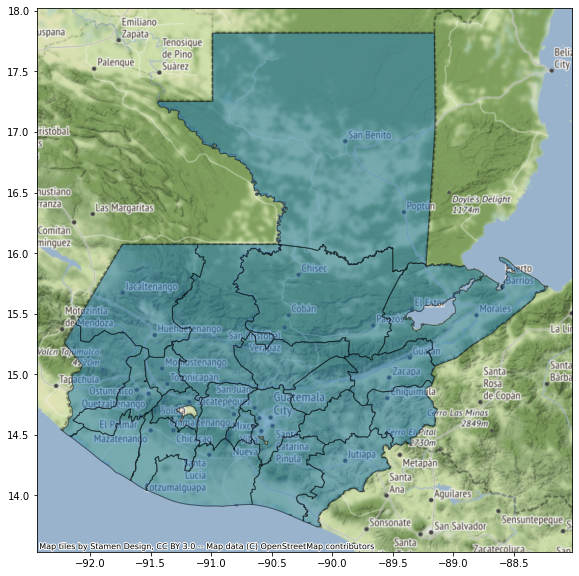

In [9]:
ax = gdf_projected.plot(figsize=(10,10), alpha=0.5, edgecolor='k')
cx.add_basemap(ax, crs=gdf_projected.crs)

You can find more information about working with projections in `geopandas` [here](https://geopandas.org/en/stable/docs/user_guide/projections.html).